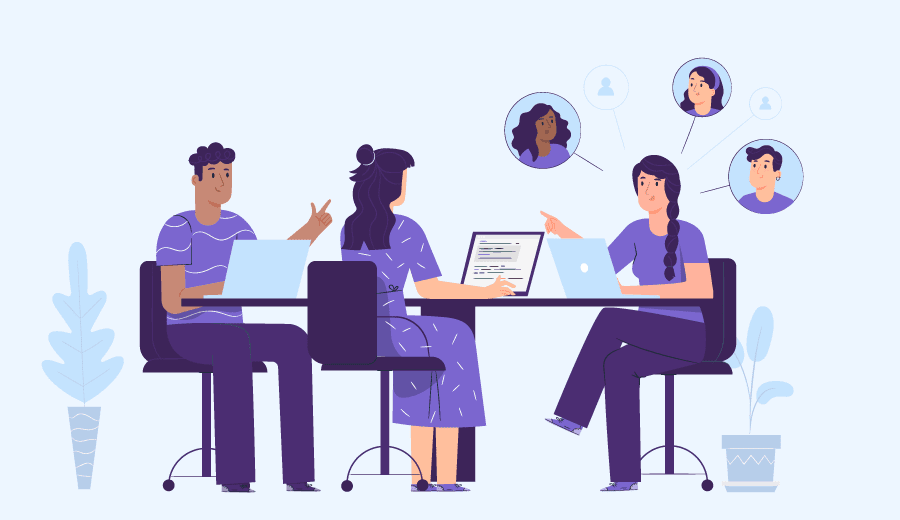

# Human Resources Analytics Project

## Análise Exploratória de Dados.

In [1]:
import pandas as pd
import datetime
import glob
from minio import Minio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

## Baixando o Daset do Data Lake.

In [3]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [4]:
df.head()

,department,salary,left,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1,2,38,53,3,0
1,sales,medium,1,5,80,86,6,0
2,sales,medium,1,7,11,88,4,0
3,sales,low,1,5,72,87,5,0
4,sales,low,1,2,37,52,3,0


### Organizando o dataset.

In [5]:
df = df[["department","salary","number_projects","satisfaction_level","last_evaluation",
        "time_in_company","work_accident","left"]]

In [6]:
df.head()

,department,salary,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,2,38,53,3,0,1
1,sales,medium,5,80,86,6,0,1
2,sales,medium,7,11,88,4,0,1
3,sales,low,5,72,87,5,0,1
4,sales,low,2,37,52,3,0,1


### Verificando os registros missing.

In [7]:
df.isnull().sum()

department            0
salary                0
number_projects       0
satisfaction_level    0
last_evaluation       0
time_in_company       0
work_accident         0
left                  0
dtype: int64

In [8]:
df[df.notnull()]

,department,salary,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,2,38,53,3,0,1
1,sales,medium,5,80,86,6,0,1
2,sales,medium,7,11,88,4,0,1
3,sales,low,5,72,87,5,0,1
4,sales,low,2,37,52,3,0,1
...,...,...,...,...,...,...,...,...
14994,support,low,2,40,57,3,0,1
14995,support,low,2,37,48,3,0,1
14996,support,low,2,37,53,3,0,1
14997,support,low,6,11,96,4,0,1


In [9]:
df = df[:14998]

### Alterando os tipos de dados.

In [10]:
df["number_projects"] = df["number_projects"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   department          14998 non-null  object
 1   salary              14998 non-null  object
 2   number_projects     14998 non-null  int32 
 3   satisfaction_level  14998 non-null  int64 
 4   last_evaluation     14998 non-null  int64 
 5   time_in_company     14998 non-null  int32 
 6   work_accident       14998 non-null  int32 
 7   left                14998 non-null  int32 
dtypes: int32(4), int64(2), object(2)
memory usage: 703.2+ KB


In [12]:
df.head()

,department,salary,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,2,38,53,3,0,1
1,sales,medium,5,80,86,6,0,1
2,sales,medium,7,11,88,4,0,1
3,sales,low,5,72,87,5,0,1
4,sales,low,2,37,52,3,0,1


### Renomeando os atributos.

In [15]:
df = df.rename(columns={'satisfaction_level': 'satisfaction',
                       'last_evaluation': 'evaluation',
                       'number_projects': 'projectCount',
                       'time_in_company': 'yearsAtCompany',
                        'work_accident' : 'workAccident',
                       'left': 'turnover'
                       })

In [16]:
df.head()

,department,salary,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,2,38,53,3,0,1
1,sales,medium,5,80,86,6,0,1
2,sales,medium,7,11,88,4,0,1
3,sales,low,5,72,87,5,0,1
4,sales,low,2,37,52,3,0,1


# Análise Estatística

### Verificando o número de registros.

In [17]:
df.shape

(14998, 8)

### Calculando a taxa de turnover.

In [18]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761968
1    0.238032
Name: turnover, dtype: float64

### Overview Estatístico dos dados.

In [19]:
df.describe()

,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,3.803174,61.284971,71.611482,3.498266,0.144619,0.238032
std,1.232546,24.863103,17.116733,1.460179,0.351728,0.425893
min,2.000000,9.000000,36.000000,2.000000,0.000000,0.000000
25%,3.000000,44.000000,56.000000,3.000000,0.000000,0.000000
50%,4.000000,64.000000,72.000000,3.000000,0.000000,0.000000
75%,5.000000,82.000000,87.000000,4.000000,0.000000,0.000000
max,7.000000,100.000000,100.000000,10.000000,1.000000,1.000000


### Overview Estatístico por turnover.

In [20]:
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident
turnover,,,,,
0,3.793490,64.330942,71.582079,3.382394,0.160396
1,3.834174,51.534454,71.705602,3.869188,0.094118


O conjunto de dados tem:

   - 14,998 observações de empregados e 8 atributos.
   - A empresa tem uma rotatividade de 24%.
   - A satisfação média dos empregados é de 61.
   - A satisfação média dos empregados que deixaram a empresa é 49.

### Calculando a matriz de correlação.

,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
projectCount,1.000000,-0.143080,0.349261,0.196767,-0.004781,0.014058
satisfaction,-0.143080,1.000000,0.104955,-0.100892,0.058673,-0.219198
evaluation,0.349261,0.104955,1.000000,0.131571,-0.007136,0.003073
yearsAtCompany,0.196767,-0.100892,0.131571,1.000000,0.002111,0.141984
workAccident,-0.004781,0.058673,-0.007136,0.002111,1.000000,-0.080253
turnover,0.014058,-0.219198,0.003073,0.141984,-0.080253,1.000000


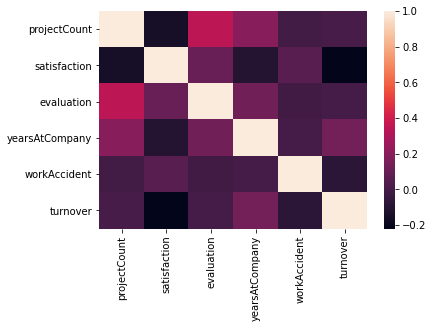

In [21]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
corr

## Correlation Matrix & Heatmap

### Atributos com uma correlação moderada positiva:

- projectCount vs Evaluation: 0.34
- yearsCompany vs projectCount: 0.19

### Atributos com uma correlação moderada negativa:

- satisfaction vs turnover: -0.21

**Questões:** 

- Quais atributos afetam a variável alvo (turnover)?
- Existem atributos com alta correlação entre eles?
- Como podemos aprofundar para entender as correlações?

**Resumo:**

Existe uma **correlação positiva** entre os atributos **projectCount vs evaluation.**

Faz sentido que empregados que estão envolvidos em mais projetos, trabalham mais e tem melhor avaliação.

Existe uma **correlação negativa** entre os atributos **satisfaction vs turnover.**

Podemos assumir que empregados que mais deixam a empresa estão menos satisfeitos.

## Calculando distribuições dos atributos.

### Verificando o turnover em relação ao salário.

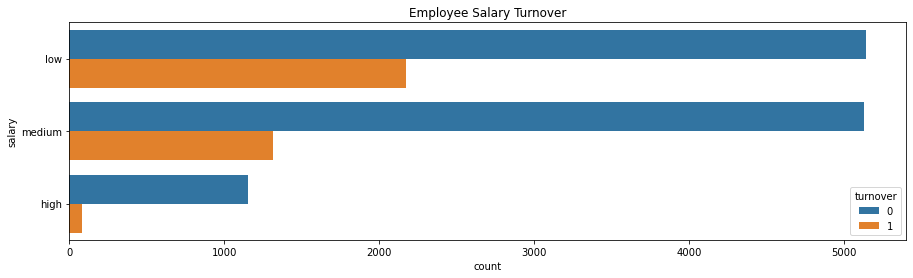

In [22]:
f, ax = plt.subplots(figsize=(15,4))
sns.countplot(y='salary', hue='turnover', data=df).set_title('Employee Salary Turnover');

# Salary vs Turnover

#### Summary:

- A maioria dos empregados que sairam tinha salário baixo ou médio.
- Quase nenhum empregado com alto salário deixou a empresa.

#### Questões:

- Como é o ambiente de trabalho? Isso se difere por salário?
- O que faz empregados com altos salários sairem da empresa?

### Verificando o turnover em relação ao departamento.

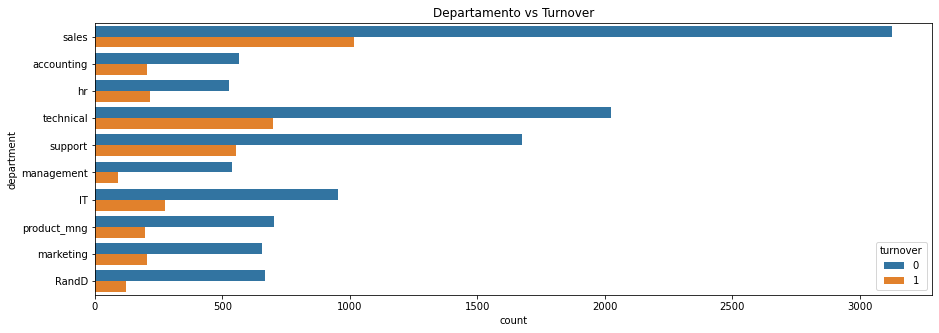

In [23]:
f, ax = plt.subplots(figsize=(15,5))
sns.countplot(y="department", hue="turnover", data=df).set_title("Departamento vs Turnover");

Text(0.5, 1.0, 'Distribuição de Departamentos')

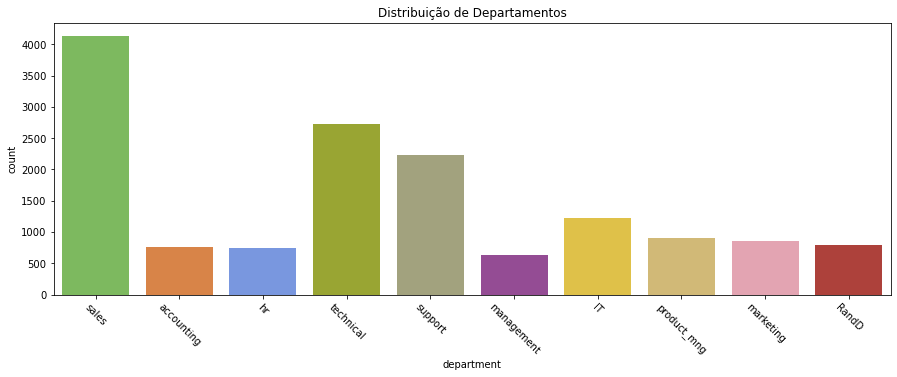

In [26]:
f,ax = plt.subplots(figsize=(15,5))
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',
              '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
plt.xticks(rotation=-45)

sns.countplot(x='department', data=df, palette=color_types).set_title('Distribuição de Departamentos')

# Department vs Turnover

#### Resumo:

- Os departamentos de **vendas, técnico e suporte**são top 3 departamentos com maior índice de **turnover.**
- O departamento management tem o menor volume de **turnover.**

#### Questões:

- Será que examinar em profundidade os departamentos que tem maior índice de turover e o menor pode nos revelar mais informações importantes?

- Qual o salário nesses departamentos?

### Verificando o turnover em relação ao número de projetos.

In [ ]:
fig = plot.figure(figsize=(8,4),)
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimador=lambda)
ax.set(ylabel="Percent")
plt.title("Turnover vs Número de Projetos")
plt.plot()